777    0.000115
613    0.000230
492    0.000230
596    0.000346
717    0.000346
         ...   
755    0.144705
326    0.145972
526    0.158760
237    0.211642
20     0.211642
Name: ENSG00000188290.10, Length: 878, dtype: float64


878

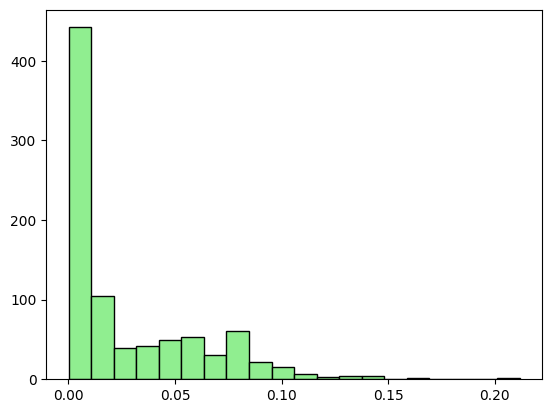

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

path="C:/Users/Miguel/Documents/UNIVERSIDAD/6_MASTER_BIOINFORMATICA/TFM/Repositorio/TFM"

expresion_total_adipose_subcutaneous=pd.read_csv(f"{path}/results/predictXcan/test/vcf_1000G_hg37_mashr/mashr_Adipose_Subcutaneous_predict.txt", sep= "\t")

# vemos la distribución de expresión de algunos genes en nuestra población  
distribucion=expresion_total_adipose_subcutaneous["ENSG00000188290.10"].sort_values(ascending=True)

plt.hist(distribucion, color='lightgreen', ec='black', bins=20)

(array([  7.,   3.,   3.,  18.,  29.,  35.,  51.,  45.,  59.,  59.,  65.,
         74.,  89.,  78.,  70.,  11.,  15.,  19., 102.,  46.]),
 array([-0.87161682, -0.77816368, -0.68471054, -0.5912574 , -0.49780426,
        -0.40435112, -0.31089798, -0.21744484, -0.1239917 , -0.03053856,
         0.06291458,  0.15636772,  0.24982086,  0.343274  ,  0.43672714,
         0.53018027,  0.62363341,  0.71708655,  0.81053969,  0.90399283,
         0.99744597]),
 <BarContainer object of 20 artists>)

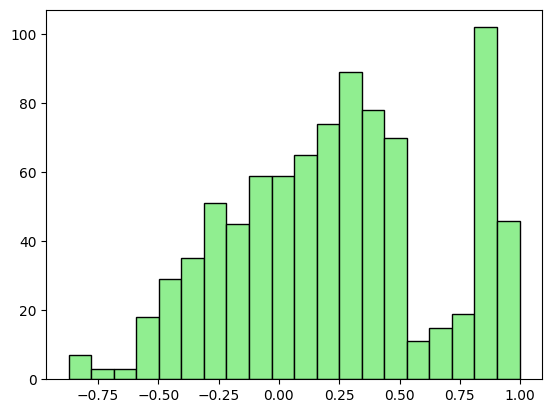

In [12]:


distribucion_2=expresion_total_adipose_subcutaneous["ENSG00000272512.1"].sort_values(ascending=True)


plt.hist(distribucion_2, color='lightgreen', ec='black', bins=20)




(array([ 92.,  36.,  14.,  11.,  11.,   9.,  10.,  12.,  20., 195., 124.,
         18.,  18.,  12.,  18.,  13.,  10.,  17.,  43., 195.]),
 array([0.        , 0.02226751, 0.04453502, 0.06680253, 0.08907004,
        0.11133755, 0.13360505, 0.15587256, 0.17814007, 0.20040758,
        0.22267509, 0.2449426 , 0.26721011, 0.28947762, 0.31174513,
        0.33401264, 0.35628015, 0.37854765, 0.40081516, 0.42308267,
        0.44535018]),
 <BarContainer object of 20 artists>)

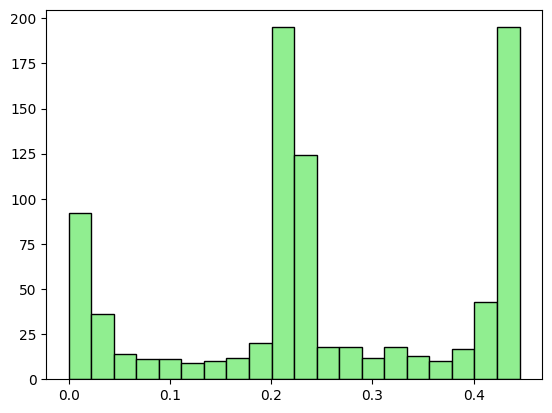

In [13]:
distribucion_3=expresion_total_adipose_subcutaneous["ENSG00000131591.17"].sort_values(ascending=True)


plt.hist(distribucion_3, color='lightgreen', ec='black', bins=20)